# FAKE NEWS CLASSIFER-TFIDF AND HASHINGVECTORIZER

In [1]:
# IMPORT LIBARIES

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('FAKENEWS/train.csv')

In [4]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
# sampling the data
df1=df.sample(frac=0.005,random_state=0)


In [6]:
# SEPARATE THE DATA INTO INDPENDENT AND DEPEDENT DATA

In [7]:
x=df1.drop('label',axis=1)

In [8]:
x.head()

,id,title,author,text
20386,20386,Bob Dylan’s Nobel Prize: A Podcast Discussion ...,Jon Pareles,Listen to this week’s podcast | Subscribe: iTu...
16794,16794,Nuclear Weapons in South Korea under Discussio...,Author,"Country: South Korea In October 2016, the Pres..."
5500,5500,Solar Storm Alert,No Author,"October 27, 2016 Solar winds triggered a giant..."
9398,9398,Keith Lamont Scott Was Killed by Two Gunshot W...,Niraj Chokshi,A black man whose fatal shooting by the pol...
4266,4266,Tom Cotton: Paul Ryan’s Healthcare Bill Does N...,Matthew Boyle,"Sen. Tom Cotton ( ) a leading GOP senator, is ..."


In [9]:
y=df1['label']

In [10]:
y.head()

20386    0
16794    1
5500     1
9398     0
4266     0
Name: label, dtype: int64

In [11]:
df1.shape

(104, 5)

In [12]:
# PREPROCESSING DATA

In [13]:
df1=df1.dropna()

In [14]:
df1.head()

,id,title,author,text,label
20386,20386,Bob Dylan’s Nobel Prize: A Podcast Discussion ...,Jon Pareles,Listen to this week’s podcast | Subscribe: iTu...,0
16794,16794,Nuclear Weapons in South Korea under Discussio...,Author,"Country: South Korea In October 2016, the Pres...",1
5500,5500,Solar Storm Alert,No Author,"October 27, 2016 Solar winds triggered a giant...",1
9398,9398,Keith Lamont Scott Was Killed by Two Gunshot W...,Niraj Chokshi,A black man whose fatal shooting by the pol...,0
4266,4266,Tom Cotton: Paul Ryan’s Healthcare Bill Does N...,Matthew Boyle,"Sen. Tom Cotton ( ) a leading GOP senator, is ...",0


In [15]:

messages=df1.copy()
messages.reset_index(inplace=True)
messages.head()


,index,id,title,author,text,label
0,20386,20386,Bob Dylan’s Nobel Prize: A Podcast Discussion ...,Jon Pareles,Listen to this week’s podcast | Subscribe: iTu...,0
1,16794,16794,Nuclear Weapons in South Korea under Discussio...,Author,"Country: South Korea In October 2016, the Pres...",1
2,5500,5500,Solar Storm Alert,No Author,"October 27, 2016 Solar winds triggered a giant...",1
3,9398,9398,Keith Lamont Scott Was Killed by Two Gunshot W...,Niraj Chokshi,A black man whose fatal shooting by the pol...,0
4,4266,4266,Tom Cotton: Paul Ryan’s Healthcare Bill Does N...,Matthew Boyle,"Sen. Tom Cotton ( ) a leading GOP senator, is ...",0


In [16]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps=PorterStemmer()
corpus=[]
for i in range(0, len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['text'][i])
    review=review.lower()
    review=review.split()
    
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)



In [17]:
corpus[3]

'black man whose fatal shoot polic septemb prompt day protest charlott n c die gunshot wound back abdomen accord autopsi perform request famili result releas wednesday show man keith lamont scott shot three time back abdomen wrist mecklenburg counti medic examin offic yet releas result autopsi scott famili author releas inform maintain begin simpli seek transpar charl g monnett lawyer famili said statement continu pursu justic famili autopsi perform sept newberri counti memori hospit morgu newberri patholog associ mr scott sport util vehicl park lot apart complex sept polic offic serv warrant someon els confront roll marijuana cigarett held gun polic said famili disput mr scott arm offic brentley vinson also black fatal shot mr scott whose action perceiv threaten polic said obscur footag shoot releas polic depart mr scott appear threaten although offic heard one point shout drop gun right hand appear empti unclear hold anyth hand shoot immedi drew protest last sever day second night on

In [18]:
# FEATURE EXRACTION WITH TFIDF

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=2000,ngram_range=(1,2))
X=tfidf_v.fit_transform(corpus).toarray()

In [20]:
X.shape

(88, 2000)

In [21]:
X[87]

array([0., 0., 0., ..., 0., 0., 0.])

In [22]:
messages.shape

(88, 6)

In [23]:
Y=messages['label']

In [24]:
Y.shape

(88,)

In [25]:
# SPLIT THE DATSET INTO TRAIN AND TEST DATA


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [27]:
tfidf_v.get_feature_names()[:10]

['aaron',
 'abandon',
 'abduct',
 'abil',
 'abl',
 'abort',
 'absolut',
 'accept',
 'access',
 'accomplish']

In [28]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 2000,
 'min_df': 1,
 'ngram_range': (1, 2),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [29]:
count_df=pd.DataFrame(x_train,columns=tfidf_v.get_feature_names())

In [30]:
count_df.head()

,aaron,abandon,abduct,abil,abl,abort,absolut,accept,access,accomplish,...,yesterday,yet,york,york time,young,yuan,zero,zero hedg,ziegler,zucker
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.047075,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.032523,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.029758,0.014879,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.016322,0.0,0.0,0.0,...,0.0,0.011233,0.022465,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.089217,0.0,0.0,0.0,0.041411,0.051315,0.0,0.0


In [31]:
# plot function for confusion matrix

In [32]:
import matplotlib.pyplot as plt

In [33]:
def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes, rotation=45)
    plt.yticks(tick_marks,classes)
    
    if normalize:
        cm=cm.astype('float') /cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print("Confusion Matrix Without Normalization")
        
    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j,i, cm[i,j],
                     horizontalalignment="center",
                     color = "white" if cm[i,j] > thresh else "black")
            
    plt.tight_layout()
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual labels')
            
    
        
    

# MULTINOMIALNB ALGOARITHM

In [34]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [35]:
from sklearn import metrics
import numpy as np
import itertools

accuracy: 0.833
Confusion Matrix Without Normalization


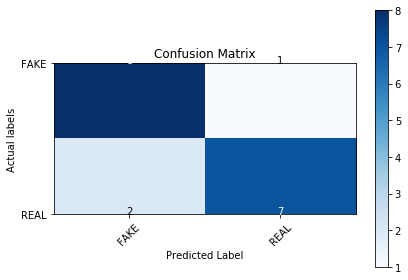

In [36]:
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
score=metrics.accuracy_score(y_test,y_pred)
print("accuracy: %0.3f"% score)
cm = metrics.confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=['FAKE','REAL'])

In [37]:
cm

array([[8, 1],
       [2, 7]], dtype=int64)

In [38]:
# plot confusion matrix with scikit learn

accuracy: 0.833
<function plot_confusion_matrix at 0x00000000118E5F78>


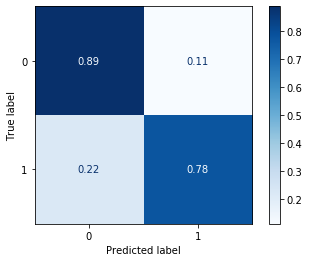

In [39]:

classifier1=classifier.fit(x_train,y_train)
y_pred=classifier1.predict(x_test)
score=metrics.accuracy_score(y_test,y_pred)
print("accuracy: %0.3f"% score)

from sklearn.metrics import plot_confusion_matrix
display=plot_confusion_matrix(classifier1,x_test,y_test,
                              cmap=plt.cm.Blues,
                              normalize='true')

print(plot_confusion_matrix)

# PASSIVE AGGRESSIVE CLASSIFIER ALGORITHM

In [40]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf=PassiveAggressiveClassifier()
linear_clf.fit(x_train,y_train)


PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

accuracy: 0.778


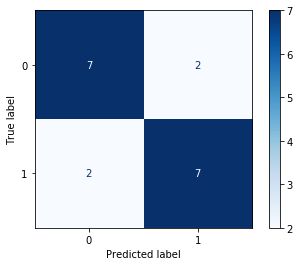

In [41]:
y_pred=linear_clf.predict(x_test)
score=metrics.accuracy_score(y_test,y_pred)
print("accuracy: %0.3f"% score)

from sklearn.metrics import plot_confusion_matrix
display=plot_confusion_matrix(linear_clf,x_test,y_test,
                              cmap=plt.cm.Blues,
                              normalize=None)

# MULTINOMIAL CLASSIFIER WITH HYPERPARAMETER

In [42]:
classifier=MultinomialNB(alpha=0.1)

In [43]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(x_train,y_train)
    y_pred=sub_classifier.predict(x_test)
    score=metrics.accuracy_score(y_test,y_pred)
    if score>previous_score:
        classifier=sub_classifier
        
    print("Alpha: {}, score: {}".format(alpha,score))
    
    

Alpha: 0.0, score: 0.6666666666666666
Alpha: 0.1, score: 0.7777777777777778
Alpha: 0.2, score: 0.8333333333333334
Alpha: 0.30000000000000004, score: 0.8888888888888888
Alpha: 0.4, score: 0.8888888888888888
Alpha: 0.5, score: 0.8888888888888888
Alpha: 0.6000000000000001, score: 0.8888888888888888
Alpha: 0.7000000000000001, score: 0.8888888888888888
Alpha: 0.8, score: 0.8333333333333334
Alpha: 0.9, score: 0.8333333333333334


C:\Users\UER\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


In [44]:
# GET THE FEATURE NAMES
feature_names=tfidf_v.get_feature_names()

In [45]:
classifier.coef_[0]

array([-7.74727844, -7.70850881, -7.74727844, ..., -7.49987229,
       -7.56566031, -7.74727844])

In [46]:
# most real
sorted(zip(classifier.coef_[0],feature_names),reverse=True)[:20]

[(-6.321569829966555, 'clinton'),
 (-6.670197914081043, 'hillari'),
 (-6.815870262516819, 'foundat'),
 (-6.847121060852193, 'russia'),
 (-6.922246977884251, 'govern'),
 (-6.937242650233269, 'trump'),
 (-6.951972799657689, 'bill'),
 (-6.9776683293324515, 'confus'),
 (-6.987805177041897, 'us'),
 (-6.988756433050449, 'hillari clinton'),
 (-6.995654618867842, 'nato'),
 (-6.997718747408275, 'peopl'),
 (-7.0249354252701055, 'gold'),
 (-7.045913906530136, 'like'),
 (-7.061349110092331, 'use'),
 (-7.075167752285445, 'need'),
 (-7.079513930548441, 'sourc'),
 (-7.102921017417173, 'email'),
 (-7.104972801184837, 'nuclear'),
 (-7.12302473359127, 'russian')]

In [47]:
sorted(zip(classifier.coef_[0],feature_names),reverse=True)[:2000]

[(-6.321569829966555, 'clinton'),
 (-6.670197914081043, 'hillari'),
 (-6.815870262516819, 'foundat'),
 (-6.847121060852193, 'russia'),
 (-6.922246977884251, 'govern'),
 (-6.937242650233269, 'trump'),
 (-6.951972799657689, 'bill'),
 (-6.9776683293324515, 'confus'),
 (-6.987805177041897, 'us'),
 (-6.988756433050449, 'hillari clinton'),
 (-6.995654618867842, 'nato'),
 (-6.997718747408275, 'peopl'),
 (-7.0249354252701055, 'gold'),
 (-7.045913906530136, 'like'),
 (-7.061349110092331, 'use'),
 (-7.075167752285445, 'need'),
 (-7.079513930548441, 'sourc'),
 (-7.102921017417173, 'email'),
 (-7.104972801184837, 'nuclear'),
 (-7.12302473359127, 'russian'),
 (-7.125139044240853, 'text'),
 (-7.12754108858462, 'cholesterol'),
 (-7.1382234403253495, 'one'),
 (-7.1420953049546565, 'comment'),
 (-7.145845095140635, 'health'),
 (-7.158793046457411, 'com'),
 (-7.160216892251789, 'report'),
 (-7.163995634155934, 'go'),
 (-7.1727540508035235, 'presid'),
 (-7.175354410431504, 'facebook'),
 (-7.1753598652865

# HashingVectorizer

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer

In [49]:
hs_vectorizer=HashingVectorizer(n_features=2000)


In [50]:
x_hv=hs_vectorizer.fit_transform(corpus).toarray()

In [51]:
x_hv.shape

(88, 2000)

In [52]:
x_hv

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.01794606],
       [ 0.        ,  0.        , -0.05725983, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        , -0.05612135]])

In [53]:
# Divide the dataset into train and test

from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x_hv,Y,test_size=0.2,random_state=0)



In [54]:
x1_train.shape

(70, 2000)

In [55]:
x1_test.shape

(18, 2000)

In [56]:
y1_train.shape

(70,)

In [57]:
y1_test.shape

(18,)

In [58]:
"""  from sklearn.preprocessing import Normalizer
normalizer=Normalizer()

x1_train=normalizer.fit_transform(x1_train)
x1_test=normalizer.fit_transform(x1_test)

x_test.shape
"""

'  from sklearn.preprocessing import Normalizer\nnormalizer=Normalizer()\n\nx1_train=normalizer.fit_transform(x1_train)\nx1_test=normalizer.fit_transform(x1_test)\n\nx_test.shape\n'

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x1_train=scaler.fit_transform(x1_train)
x1_test=scaler.fit_transform(x1_test)

In [60]:
x1_train

array([[0.48207992, 0.68729167, 0.3157129 , ..., 0.26845279, 0.79179696,
        0.81730798],
       [0.48207992, 0.68729167, 0.        , ..., 0.26845279, 0.79179696,
        0.68297877],
       [0.60227258, 0.68729167, 0.3157129 , ..., 0.46924556, 1.        ,
        0.81730798],
       ...,
       [0.48207992, 0.68729167, 0.3157129 , ..., 0.26845279, 0.79179696,
        0.29386798],
       [0.48207992, 0.68729167, 0.3157129 , ..., 0.26845279, 0.79179696,
        0.81730798],
       [0.48207992, 0.68729167, 0.3157129 , ..., 0.26845279, 0.79179696,
        0.81730798]])

In [61]:
x1_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.63816048],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.32166017],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.69176292]])

In [62]:
y1_train.shape

(70,)

In [63]:
y1_test.shape

(18,)

accuracy: 0.556


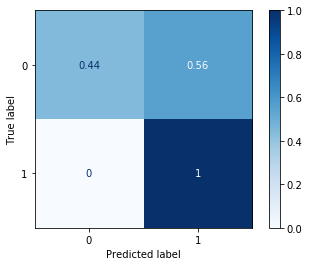

In [64]:
classifier2=classifier.fit(x1_train,y1_train)
y_pred=classifier2.predict(x1_test)
score=metrics.accuracy_score(y1_test,y_pred)
print("accuracy: %0.3f"% score)

from sklearn.metrics import plot_confusion_matrix
display=plot_confusion_matrix(classifier1,x1_test,y1_test,
                              cmap=plt.cm.Blues,
                              normalize='true')